In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_parquet("data/cleaned_artwork_data.parquet")

In [3]:
data.head()

,ConstituentID,DisplayName,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN,Title,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Height (cm),Width (cm),completedDate,DateAcquired_year,DateAcquired_month,DateAcquired_day,DateAcquired_weekday
0,1,Robert Arneson,American,Male,1930,1992,Unknown,0.0,Study for Head Bath,Conté crayon and pencil on paper,"41 5/8 x 29 7/8"" (105.8 x 75.8 cm)",Gift of the Friends of Contemporary Drawing,67.1981,Drawing,Drawings & Prints,1981-04-28,Y,33599.0,http://www.moma.org/collection/works/33599,http://www.moma.org/media/W1siZiIsIjMwODE4MyJd...,105.7,75.9,1977.0,1981,4,28,1
1,1,Robert Arneson,American,Male,1930,1992,Unknown,0.0,General Nuke,Lithograph,"composition (irreg.): 31 11/16 x 23 5/16"" (80....",Gift of Landfall Press,192.1997,Print,Drawings & Prints,1997-05-28,Y,64139.0,http://www.moma.org/collection/works/64139,Unknown,80.5,59.2,1986.0,1997,5,28,2
2,2,Doroteo Arnaiz,Spanish,Male,1936,0,Unknown,0.0,BAS-RELIEF,"Etching, printed in color","Plate 21 1/2 x 15 5/8"" (54.7 x 39.7 cm) Sheet ...",Gift of the artist,87.1965,Print,Drawings & Prints,1965-03-09,N,61629.0,Unknown,Unknown,54.7,39.7,2022.0,1965,3,9,1
3,3,Bill Arnold,American,Male,1941,0,Unknown,0.0,Honey under Sink,Microfilm reader-printer machine print,"15 × 22 7/8"" (38.1 × 58.2 cm)",Purchase,87.1972,Photograph,Photography,1972-03-07,Y,45972.0,http://www.moma.org/collection/works/45972,http://www.moma.org/media/W1siZiIsIjI1ODcxNiJd...,38.1,58.2,1971.0,1972,3,7,1
4,3,Bill Arnold,American,Male,1941,0,Unknown,0.0,Honey under Chair,Microfilm reader-printer machine print,"15 × 22 3/4"" (38.1 × 57.8 cm)",Purchase,88.1972,Photograph,Photography,1972-03-07,Y,45997.0,http://www.moma.org/collection/works/45997,http://www.moma.org/media/W1siZiIsIjI1ODcxNyJd...,38.1,57.8,1971.0,1972,3,7,1


In [4]:
data.shape

(129892, 27)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129892 entries, 0 to 129891
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ConstituentID         129892 non-null  int64         
 1   DisplayName           129892 non-null  object        
 2   Nationality           129892 non-null  object        
 3   Gender                129892 non-null  object        
 4   BeginDate             129892 non-null  int64         
 5   EndDate               129892 non-null  int64         
 6   Wiki QID              129892 non-null  object        
 7   ULAN                  129892 non-null  float64       
 8   Title                 129892 non-null  object        
 9   Medium                129892 non-null  object        
 10  Dimensions            129892 non-null  object        
 11  CreditLine            129892 non-null  object        
 12  AccessionNumber       129892 non-null  object        
 13 

In [6]:
data.isna().sum()

ConstituentID           0
DisplayName             0
Nationality             0
Gender                  0
BeginDate               0
EndDate                 0
Wiki QID                0
ULAN                    0
Title                   0
Medium                  0
Dimensions              0
CreditLine              0
AccessionNumber         0
Classification          0
Department              0
DateAcquired            0
Cataloged               0
ObjectID                0
URL                     0
ThumbnailURL            0
Height (cm)             0
Width (cm)              0
completedDate           0
DateAcquired_year       0
DateAcquired_month      0
DateAcquired_day        0
DateAcquired_weekday    0
dtype: int64

### Acquistion Analysis

<Axes: xlabel='DateAcquired_year'>

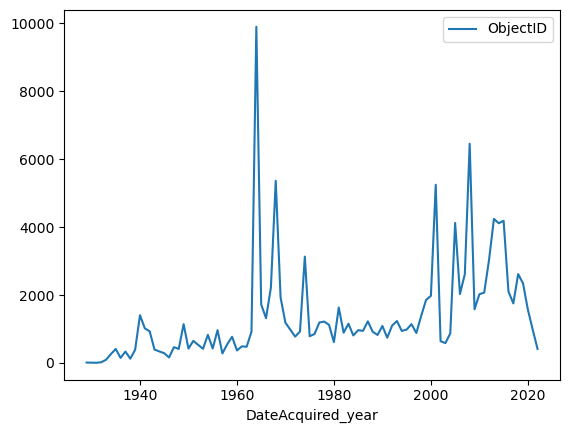

In [12]:
data[["DateAcquired_year", "ObjectID"]].groupby("DateAcquired_year").count().plot()

<Axes: xlabel='DateAcquired_month'>

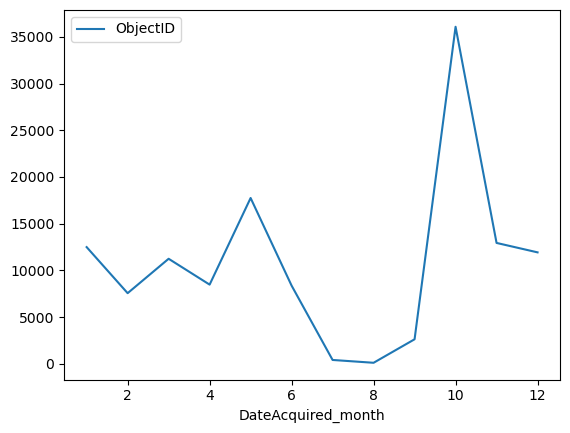

In [13]:
data[["DateAcquired_month", "ObjectID"]].groupby("DateAcquired_month").count().plot()

<Axes: xlabel='DateAcquired_day'>

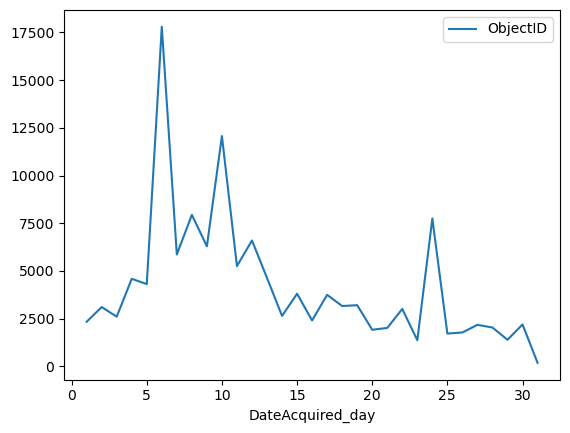

In [14]:
data[["DateAcquired_day", "ObjectID"]].groupby("DateAcquired_day").count().plot(kind="line")